# Rain Prediction

---

## Introduction
Author : Hafidzati Hikmadani <br>



## Dataset
<b>Context</b>
Predict next-day rain by training classification models on the target variable RainTomorrow.

<b>Content</b>
This dataset contains about 10 years of daily weather observations from many locations across Australia.

RainTomorrow is the target variable to predict. It means -- did it rain the next day, Yes or No? This column is Yes if the rain for that day was 1mm or more.

<b>Source & Acknowledgements</b>
Observations were drawn from numerous weather stations. The daily observations are available from http://www.bom.gov.au/climate/data.
An example of latest weather observations in Canberra: http://www.bom.gov.au/climate/dwo/IDCJDW2801.latest.shtml

Definitions adapted from http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml
Data source: http://www.bom.gov.au/climate/dwo/ and http://www.bom.gov.au/climate/data.

Copyright Commonwealth of Australia 2010, Bureau of Meteorology.

You could download dataset from [here](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package).<br>




## Goals

Goals of this notebook is to create a model that could predict wether tomorrow is rain or not in Australia and find out the most rainy year including its location in Australia.

## Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score


## Data Loading

In [2]:
#Load dataset
data = pd.read_csv("weatherAUS.csv")

In [3]:
#Preview shape of data
print(data.shape)

(145460, 23)


We have our dataset with 23 columns and 145.460 of data rows.

In [4]:
#Preview dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
#Privew spoiler of data
pd.set_option('display.max_columns', None) #to shown all the columns 
data.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0           W           44.0          W        WNW          20.0   
1         WNW           44.0        NNW        WSW           4.0   
2         WSW           46.0          W        WSW          19.0   
3          NE           24.0         SE          E          11.0   
4           W           41.0        ENE         NW           7.0   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0          24.0         71.0         22.0       1007.7       1007.1       8.0   
1          22.0         44.0         25.0       1010.6       1007.8       NaN   
2          26.0         38.0         30.0       1007.6       1008.7       NaN   
3           9.0         45.0         16.0       1017.6       1012.8       NaN   
4          20.0         82.0         33.0       1010.8       1006.0       7.0   

   Cloud3pm  Temp9am  Temp3pm RainToday RainTomorrow  
0       NaN     16.9     21.8        No           No  
1       NaN     17.2     24.3        No           No  
2       2.0     21.0     23.2        No           No  
3       NaN     18.1     26.5        No           No  
4       8.0     17.8     29.7        No           No

## Data Cleaning

In [6]:
#Copy dataset
df = data.copy()

### Missing Values

Here we will find out any missing values or null values of dataset and remove it if it's not relevant.
We'll divide the numeric column and categorical column since both tipe will have different treatment of missing values.

In [7]:
#Numeric columns
df_numeric = df.select_dtypes(exclude="object")
print("Our numeric columns : ")
print(df_numeric.columns)
print("Total of our numeric columns : " , len(df_numeric.columns))
print("")


#Categorical columns
df_categoric = df.select_dtypes(include="object")
print("Our caegorical columns : ")
print(df_categoric.columns)
print("Total of our categorical columns : " , len(df_categoric.columns))


Our numeric columns : 
Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')
Total of our numeric columns :  16

Our caegorical columns : 
Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')
Total of our categorical columns :  7


We have 16 columns with numeric datatype and 7 columns with categorical datatypes above. Next , to choose the best approach of missing value we will analyze missing values of each columns before.

#### Analyze Numeric Missing values

In [8]:
#Check missing value of numeric columns
print(round(df_numeric.isnull().sum()/len(df_numeric)*100),2)

MinTemp           1.0
MaxTemp           1.0
Rainfall          2.0
Evaporation      43.0
Sunshine         48.0
WindGustSpeed     7.0
WindSpeed9am      1.0
WindSpeed3pm      2.0
Humidity9am       2.0
Humidity3pm       3.0
Pressure9am      10.0
Pressure3pm      10.0
Cloud9am         38.0
Cloud3pm         41.0
Temp9am           1.0
Temp3pm           2.0
dtype: float64 2


We could see Evaporation, Sunshine, Cloud9am and Cloud3pm has high percentage of missing values (almost 50%) so we couldnt drop the missing rows of these, because it will impact to our distribution of data. We will lost almost a half of our dataset. So to handle this problem, we assume that we don't have enough data for those columns so we choose drop it.

For the rest of column, since it has low percentage of missing values, we will impute those missing values with the mean of the data.

####  Analyze Categorical Missing Values

In [9]:
#Check missing value of categoric columns
print(round(df_categoric.isnull().sum()/len(df_categoric)*100),2)

Date            0.0
Location        0.0
WindGustDir     7.0
WindDir9am      7.0
WindDir3pm      3.0
RainToday       2.0
RainTomorrow    2.0
dtype: float64 2


We could see WindGustDir, WindDir9am, WindDir3pm, RainToday and RainTomorrow has low percentage of missing values, so we will continue to check the cardinality of those columns.

In [10]:
#Check the cardinality of data
for col in list(df_categoric):
    if col not in ['Date' ,'Location'] :
        cardinality = len(pd.Index(df_categoric[col]).value_counts())
        print(df_categoric[col].name + ": " + str(cardinality))

WindGustDir: 16
WindDir9am: 16
WindDir3pm: 16
RainToday: 2
RainTomorrow: 2


The cardinality of those columns above is not that high, so we decide to impute the null values with mode of the values in dataset.

### Execute the missing values

From above analysis of missing value, we could summary the approach that we will use in this notebook :
1. For numeric columns with low percentage of missing value, we will impute the missing values using the mean of dataset.
2. For numeric columns with high percentage of missing value, we will drop the columns.
3. For categorical columns with missing values, we will impute with mode value of dataset.

In [11]:
#Drop numeric column with high percentage missing value 
df.drop(['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'], axis=1, inplace=True)

In [12]:
#Impute numeric column with  low percentage missing value columns by the mean.

#declare imputer
num_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

#impute only the numeric columns
df[list(df.select_dtypes(exclude="object"))] = pd.DataFrame( num_imputer.fit_transform(df.select_dtypes(exclude="object")))


In [13]:
#Impute categorical column

#declare imputer
cat_imputer= SimpleImputer(missing_values=np.nan, strategy='most_frequent')

#impute only categoric columns
df[list(df.select_dtypes(include='object'))] = pd.DataFrame (cat_imputer.fit_transform(df.select_dtypes(include='object')))

In [14]:
#Check our null value
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

We could see above, all of our dataset has no missing values anymore.

### Handling Data Types

Recall to our previus dataset columns, we have Date column with object data type. Commonly it used to be datetime columns. But in this case, we would break the Date columns to 3 columns : Day, Month, Year. It used to our future modeling purposes.

In [15]:
#Split Date Column 
df[['Year', 'Month','Day']] = df['Date'].str.split("-", expand=True)

#Convert to numeric type
df[['Year', 'Month','Day']] = df[['Year', 'Month','Day']]

In [16]:
#Preview result
print(df.shape)
df.info()

(145460, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        145460 non-null  float64
 3   MaxTemp        145460 non-null  float64
 4   Rainfall       145460 non-null  float64
 5   WindGustDir    145460 non-null  object 
 6   WindGustSpeed  145460 non-null  float64
 7   WindDir9am     145460 non-null  object 
 8   WindDir3pm     145460 non-null  object 
 9   WindSpeed9am   145460 non-null  float64
 10  WindSpeed3pm   145460 non-null  float64
 11  Humidity9am    145460 non-null  float64
 12  Humidity3pm    145460 non-null  float64
 13  Pressure9am    145460 non-null  float64
 14  Pressure3pm    145460 non-null  float64
 15  Temp9am        145460 non-null  float64
 16  Temp3pm        145460 non-null  float64
 17  RainToday      1

Now we have 22 columns in dataset.

In [17]:
#Drop the date columns
df.drop(['Date'], axis=1, inplace=True)

In [18]:
#Show dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  object 
 1   MinTemp        145460 non-null  float64
 2   MaxTemp        145460 non-null  float64
 3   Rainfall       145460 non-null  float64
 4   WindGustDir    145460 non-null  object 
 5   WindGustSpeed  145460 non-null  float64
 6   WindDir9am     145460 non-null  object 
 7   WindDir3pm     145460 non-null  object 
 8   WindSpeed9am   145460 non-null  float64
 9   WindSpeed3pm   145460 non-null  float64
 10  Humidity9am    145460 non-null  float64
 11  Humidity3pm    145460 non-null  float64
 12  Pressure9am    145460 non-null  float64
 13  Pressure3pm    145460 non-null  float64
 14  Temp9am        145460 non-null  float64
 15  Temp3pm        145460 non-null  float64
 16  RainToday      145460 non-null  object 
 17  RainTomorrow   145460 non-nul

## Data Exploration

Firstly we will take a slight distribution of numeric data in our dataset using histogram.

<ipython-input-19-4240cf3e1e2e>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(ax = ax , color= 'orange' );


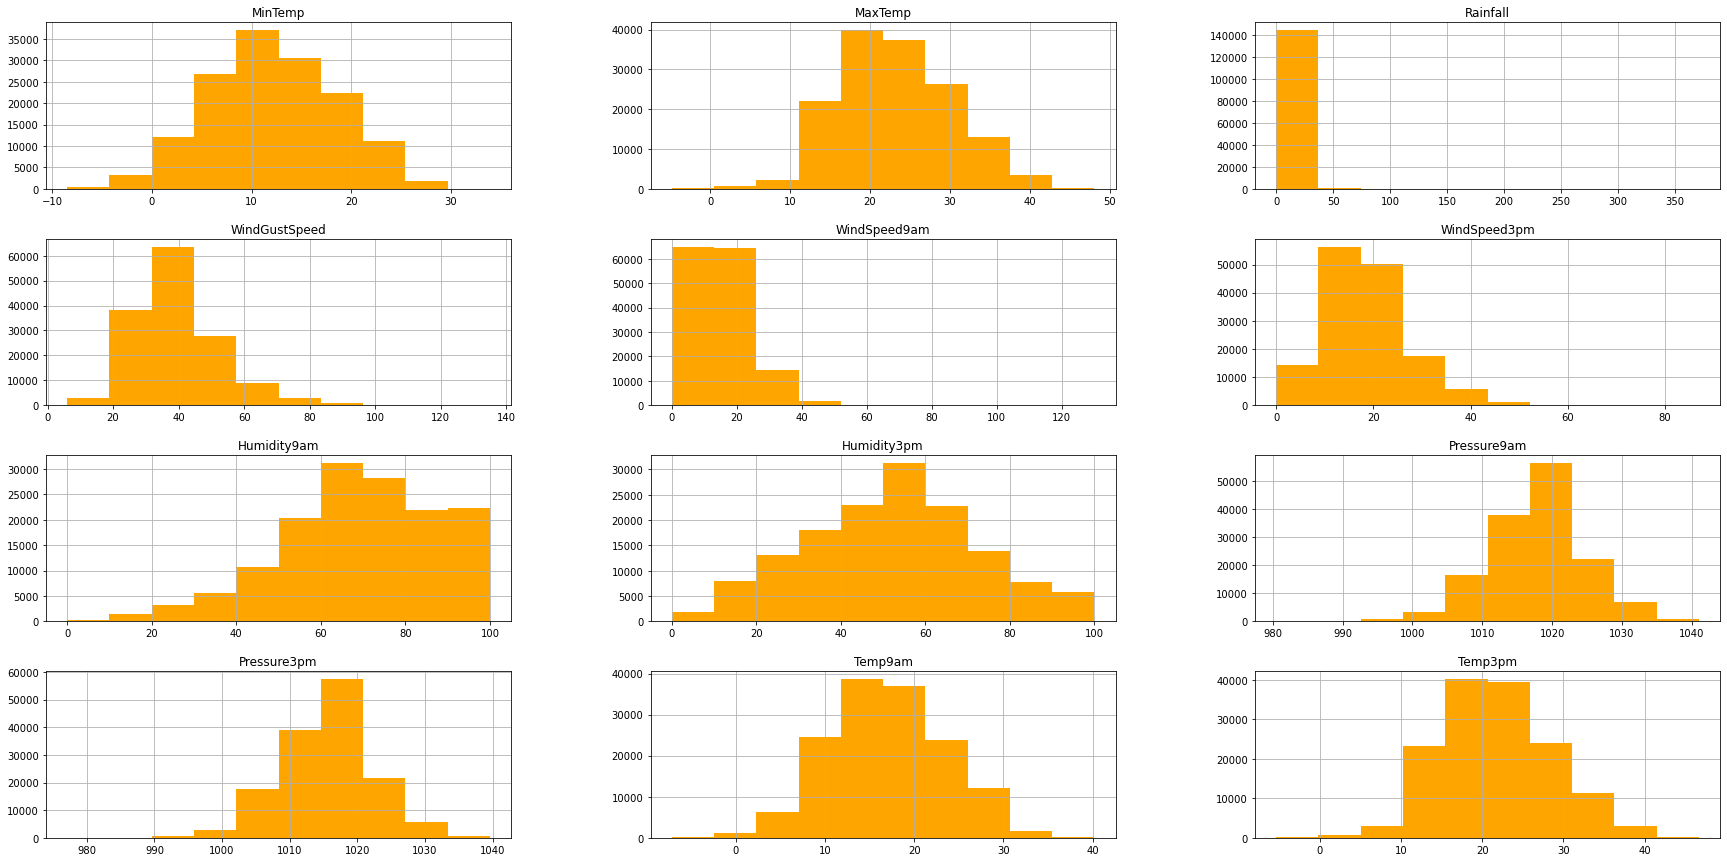

In [19]:
#Create histogram for all column in dataset
fig = plt.figure(figsize = (30,15));
ax = fig.gca();
df.hist(ax = ax , color= 'orange' );

From above , we could see MinTemp, MaxTemp, Humidity3pm, Temp9am, Temp3pm, Pressure9am, Pressure3pm tend to have normal distribution. 

At the other hands columns Rainfall,WindSpeed9am, WindSpeed3am, WindGustSpeed and Humidity9am has skewed data which indicates these has high variation of data.

We will ignore Month, Day and Year since it's only identifer of date of the rainfall history.

Now, let's take a look how is average rainfall of each month to know the highest average of rainfall.


Highest rainfall average :  5.568965517241378


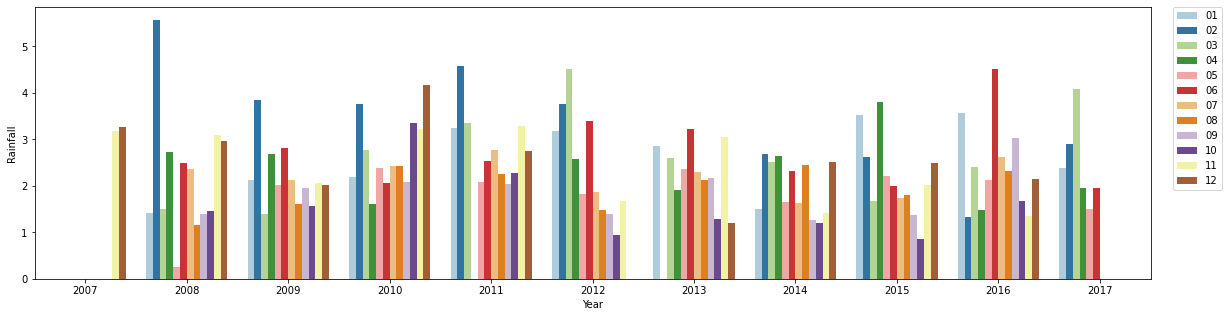

In [20]:
#Query
q1 = df.groupby(["Year","Month"])["Rainfall"].mean().reset_index().sort_values(by=['Year', 'Month'])

print("Highest rainfall average : ", q1['Rainfall'].max()) #highest rainfall average

#Graph
plt.figure(figsize=(20,5));
sns.barplot(data = q1  , x="Year", y="Rainfall" , hue="Month", hue_order=np.sort(q1["Month"].unique()), palette="Paired")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);

We could see the highest rainfall average is happened in February 2008 with average rainfal 5,57

Next we will find where's the location which is often rainy in 2008 and rarely rainy in 2008.

Highest rain day  :  96
Lowest rain day   :  4


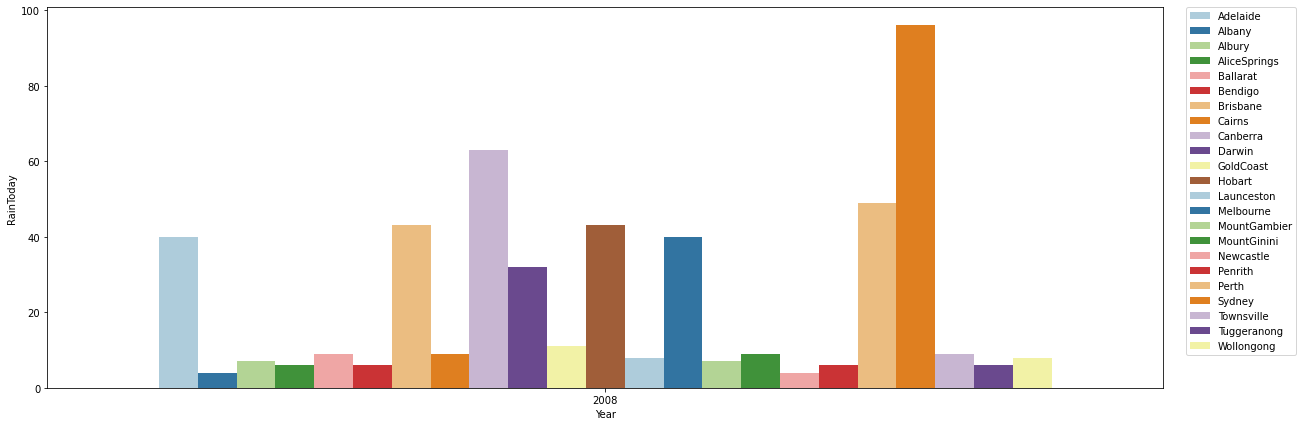

In [21]:
#Query
q2 = df[(df["Year"] == "2008") & (df["RainToday"] == "Yes")].groupby(["Year","Location"])["RainToday"].count().reset_index()
#df[(df["Year"] == "2008") & (df["RainToday"] == "Yes")]
print("Highest rain day  : ", q2['RainToday'].max()) #highest rain day
print("Lowest rain day   : ", q2['RainToday'].min()) #highest rain day

#Graph
plt.figure(figsize=(20,7));
sns.barplot(data = q2  , x="Year", y="RainToday" , hue="Location",  palette="Paired")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);



We could see from above data Sydney is the most often rain 2008 with total 92 day of rain in that year while Newcastle is the most rare rainy in 2008 with total 4 day of rain in 2008.

Recalling previous distribution data, let's focus on Rainfall and WindGustSpeed columns and find out if there is any outlier in there.

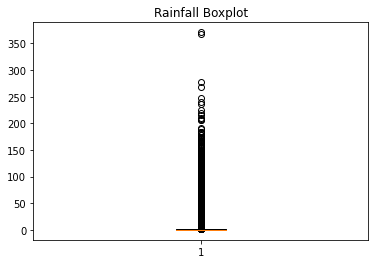

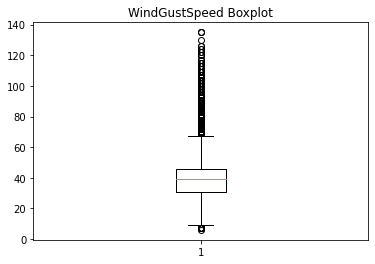

In [22]:
#Boxplot Rainfall
plt.boxplot(df["Rainfall"])
plt.title("Rainfall Boxplot")
plt.show()

#Boxplot WindGust Speed
plt.boxplot(df["WindGustSpeed"])
plt.title("WindGustSpeed Boxplot")
plt.show()

From above boxplot we could see Rainfall has so many outlier which mean it has so high variance data. The gap between the Q3 and outlier of data is so far.

It's happening with WindGustSpeed too, but it's not as much as Rainfall.

Since it's talk about the weather , that something more extreme might be happend at future, in the modeling we will accept the outlier.

## Data PreProcessing

Recalling our goals to predict wether tomorrow is rainy or not in Australia , before we jump to our modelling, we need to do some PreProcessing of our data. In this section we will do 2 activity :
1. Split the data into training set and test set
2. Features Selection 
3. Encoding Categorical Data
4. Scaling our dataset

Here , we divide columns in our dataset as Target and Feature. We have column _RainTomorrow_ as our Target and the rest columns becomes our Features.

### Split Data 

Below we will split our dataset into Training Set, Testing Set and Sampling Set. 

Sampling Set will be 10% from dataset, while Testing Set will be 20% from Training Set.

In [23]:
#split data to train ,test and sample
datamodel , sample_df = train_test_split(df, test_size=0.1, random_state=2)
train_df , test_df = train_test_split(datamodel, test_size=0.2, random_state=4)

sampe_df = sample_df.reset_index(drop=True)
train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

print("Total of training data : ", train_df.shape[0])
print("Total of testing  data : ", test_df.shape[0])
print("Total of sample  data : ", sample_df.shape[0])

Total of training data :  104731
Total of testing  data :  26183
Total of sample  data :  14546


So we have 104.731 rows for training data ,26.183 for testing data and 14.546 for sample data. Next we will divide each dataset into X (contains features only) and y (Contains the target)

In [24]:
#split data from its feature and target for training data
X_train_unscaled = train_df.drop(['RainTomorrow'], axis=1)
y_train_unscaled = pd.DataFrame(train_df['RainTomorrow'],columns=['RainTomorrow'])

#split data from its feature and target for test data 
X_test_unscaled = test_df.drop(['RainTomorrow'], axis=1)
y_test_unscaled = pd.DataFrame(test_df['RainTomorrow'], columns=['RainTomorrow'])

### Features and Target Normalization

After we split the data, we need to normalize or scaling both of categorical or numeric features so we could build more accurate modeling since every features might have different measure values.


In this section we will use OrdinalEncoder to normalize our categorical features and use MinMaxScaler for our numerical features.


In [25]:
#Split numeric features and categorical features
X_train_unscaled_num =  X_train_unscaled.select_dtypes(exclude="object") #train data
X_train_unscaled_cat =  X_train_unscaled.select_dtypes(include="object") #train data

X_test_unscaled_num =  X_test_unscaled.select_dtypes(exclude="object") #test data
X_test_unscaled_cat =  X_test_unscaled.select_dtypes(include="object") #test data

#Define the normalizer / encoder
feat_en = OrdinalEncoder() #categorical encoder
scaler = MinMaxScaler() #numerical scaler
target_en = LabelEncoder() #target encoder

#Normalize/Encode train dataset
X_train_scaled_cat= pd.DataFrame(feat_en.fit_transform(X_train_unscaled_cat),columns=X_train_unscaled_cat.columns)
X_train_scaled_num= pd.DataFrame(scaler.fit_transform(X_train_unscaled_num) , columns= X_train_unscaled_num.columns)
y_train_scaled = pd.DataFrame(target_en.fit_transform(y_train_unscaled['RainTomorrow']) , columns=['RainTomorrow']) #0 is No , 1 is yes

X_train_scaled = pd.concat([X_train_scaled_cat, X_train_scaled_num], axis=1)


#Normalize/Encode test dataset
X_test_scaled_cat= pd.DataFrame(feat_en.transform(X_test_unscaled_cat),columns= X_test_unscaled_cat.columns)
X_test_scaled_num= pd.DataFrame(scaler.transform(X_test_unscaled_num) , columns= X_test_unscaled_num.columns)
y_test_scaled = pd.DataFrame(target_en.transform(y_test_unscaled['RainTomorrow']), columns= ['RainTomorrow']) #0 is No , 1 is yes

X_test_scaled = pd.concat([X_test_scaled_cat, X_test_scaled_num], axis=1)



### Feature Selection

Feature selection is activity to filter or choose the feature that will be used in data modelling. As we know, many features processed in modeling will impact the performance of modelling from its acurracy event the memory consumed in the modelling. That's why we only need to process the relevant feature in data modelling create an effective modelling.

In this feautre selection, we will do different approach of feature selection between numerical feature and categorical features. 
1. We will use ANNOVA approach using sklearn f_classic() for numerical features.
2. We will use Chi-Square approach using sklearnn SelecKBest for categorial features.

#### Numerical Feature Selection

Feature MinTemp : 697.40 
Feature MaxTemp : 2656.37 
Feature Rainfall : 5958.33 
Feature WindGustSpeed : 5339.57 
Feature WindSpeed9am : 796.88 
Feature WindSpeed3pm : 721.80 
Feature Humidity9am : 7098.89 
Feature Humidity3pm : 24335.49 
Feature Pressure9am : 5889.72 
Feature Pressure3pm : 4885.60 
Feature Temp9am : 72.23 
Feature Temp3pm : 3838.71 



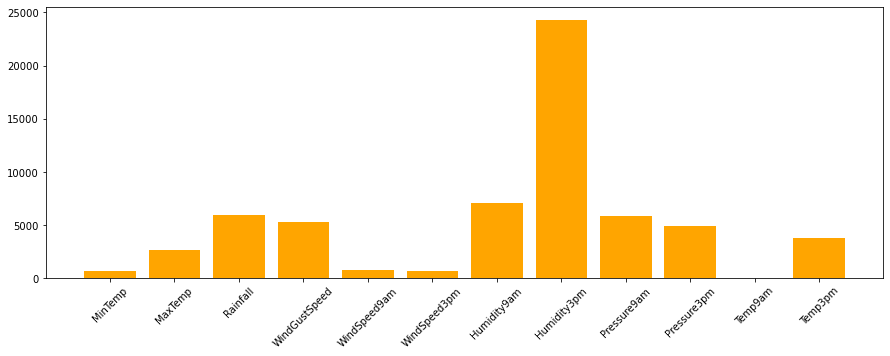

In [26]:
#Define Feature Selection with ANNOVA approach
fs_num = SelectKBest(score_func=f_classif, k='all')

#Apply numerical feature selection to Training Data
X_features_num = fs_num.fit_transform(X_train_scaled_num, y_train_unscaled['RainTomorrow'])

# what are scores for the features
for col in list(X_train_scaled_num.columns):
  score = fs_num.scores_[X_train_scaled_num.columns.get_loc(col)]
  print("Feature %s : %.2f " %(col , score))
print("")

#barplot
plt.figure(figsize=(15,5))
plt.bar([col for col in list(X_train_scaled_num.columns)], fs_num.scores_ , color="orange")
plt.xticks(rotation=45)
plt.show()


Above information represent the correlation via ANNOVA approach between our numeric features with the target. High score of ANNOVA of features means it has high relation/correlation with the target. 

So in this case, we will choose only 5 top features that has high correlation with RainTomorrow to be used in our model :
1. Humidity3pm
2. Humidity9am
3. Rainfall
4. Pressure9am
5. WindGustSpeed

#### Categorical Feature Selection

Feature Location : 13.86 
Feature WindGustDir : 704.45 
Feature WindDir9am : 391.73 
Feature WindDir3pm : 259.13 
Feature RainToday : 7537.15 
Feature Year : 27.49 
Feature Month : 9.29 
Feature Day : 24.25 



([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

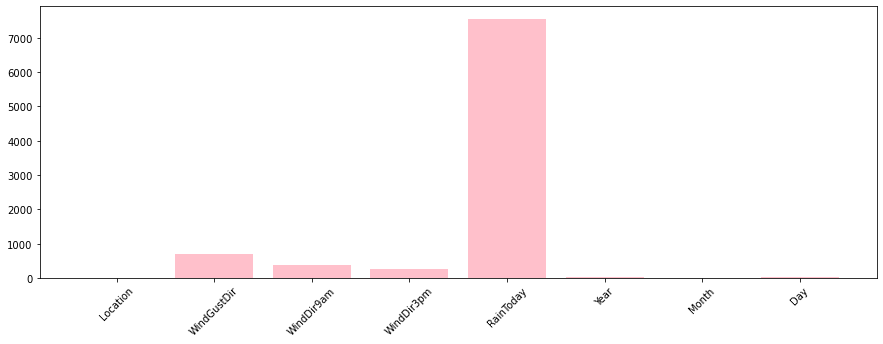

In [27]:
#Define Feature Selection with Chi-Square approach
fs_cat = SelectKBest(score_func=chi2, k='all')

#Apply categorical feature selection to Training Data
X_features_cat = fs_cat.fit_transform(X_train_scaled_cat, y_train_scaled['RainTomorrow'])

# what are scores for the features
for col in list(X_train_scaled_cat.columns):
  score = fs_cat.scores_[X_train_scaled_cat.columns.get_loc(col)]
  print("Feature %s : %.2f " %(col , score))
print("")

#barplot
plt.figure(figsize=(15,5));
plt.bar([col for col in list(X_train_scaled_cat.columns)], fs_cat.scores_ , color="pink");
plt.xticks(rotation=45);


Above information represent the correlation via Chi-Square approach between our categorical features with the target. High score of Chi-Square of features means it has high relation/correlation with the target. 

So in this case, we will choose only 2 top features that has high correlation with RainTomorrow to be used in our model :
1. RainToday
2. WindGustDir

### Final Processing Dataset

We've determined relevant features for our model before, now we will combine those chosen feature into final dataset to process to next model.

In [28]:
X_train = X_train_scaled[['RainToday','WindGustDir','Humidity3pm','Humidity9am','Rainfall', 'Pressure9am','WindGustSpeed']]
y_train = y_train_scaled

X_test = X_test_scaled[['RainToday','WindGustDir','Humidity3pm','Humidity9am','Rainfall', 'Pressure9am','WindGustSpeed']]
y_test = y_test_scaled


## Model Definition

In this section, we will define our model data. At previous Data Preprocessing we already have 7 features and 1 target of data to process. And also we've already split the dataset to train and test data. Features are the variable/column that might give an effect to our target variable. Below are our target data and features.

Target    : RainTomorrow <br>

Features :
1. RainToday
2. WindGustDir
3. Humidity3pm
4. Humidity9am
5. Rainfall
6. Pressure9am
7. WindGustSpeed


As our goals to predict wether tomorrow is rain or nit, we will use Classification for our modeling. But here we will try to make several option of model and find out the best model that fit our expectation.

We decide to take 2 example of Classification model then compared it to choose the best model :
1. Model 1: Logistic Regression
2. Model 2 : SVM using Support Vector Classifier (SVR)


### Model 1 : Logistic Regression

For Logistic Regression we will use solver lbfgs as our hyperparameter.

In [29]:
#Create Model 1 Logistic Regression
log_reg = LogisticRegression(solver='lbfgs', random_state=2)

### Model 2 : SVC (Support Machine Classifier)

In SVC Model we will use kernel linear with C value = 1

_Since author enviroment memory capacity, this notebook only could try with C value 1_

In [30]:
# Create Model 2 SVC
svc_model = SVC(kernel='linear', C=1)

## Model Training

In this section, we will train our data using the model we created before then we tried to predict our train data and test data using the model.

### Train Model 1 : Logistic Regression

In [31]:
#train the model with our data train
log_reg.fit(X_train, y_train['RainTomorrow'])

#predict against train data
y_train_p1 = pd.DataFrame(log_reg.predict(X_train),columns=["pred_RainTomorrow"])

#predict against test data
y_test_p1 = pd.DataFrame(log_reg.predict(X_test),columns=["pred_RainTomorrow"])


### Train Model 2 : SVC

_Warn : It will take arond 5 minutes to train the data_

In [32]:
#train the model with our data train
svc_model.fit(X_train, y_train["RainTomorrow"])

#predict against train data
y_train_p2 = pd.DataFrame(svc_model.predict(X_train),columns=["pred_RainTomorrow"])

#predict against test data
y_test_p2 = pd.DataFrame(svc_model.predict(X_test),columns=["pred_RainTomorrow"])


## Model Evaluation

In this section we will evaluate the model by comparing value of Confusion Matrics, Precision, Recall, Accuracy Score, ROC Value.

1. Confusion Matrics is value that represents total of true positive, true negatif , false positive and false negative of data that produced by the model. 
2. Precision is comparison between true positive and total of data which are predicted as positive.
3. Recall is is comparison between true positive and total of data which are actually as positive.
4. F1-Score is the harmonic mean from Precision and Recall
5. AUC Value is total probability of confusion matriks from all treshold in the model.

Moreover we also evaluate the fitting of model by comparing difference of Accuracy Score value of training data and testing data of each model.

### Evaluation Model 1 : Logistic Regression

Accuracy of logistic regression classifier on test set: 0.84

[[19426  1022]
 [ 3212  2523]]

Evaluation report : 
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     20448
           1       0.71      0.44      0.54      5735

    accuracy                           0.84     26183
   macro avg       0.78      0.69      0.72     26183
weighted avg       0.83      0.84      0.82     26183


AUC Score :  0.6949749073244075


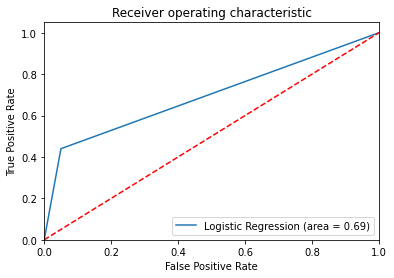

0.5437500000000001


In [33]:
#Accuracy model
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(log_reg.score(X_test, y_test)))
print("")

#confussion matrix
confusion_matrix1 = confusion_matrix(y_test, y_test_p1)
print(confusion_matrix1)
print("")

#Classification report
print("Evaluation report : ")
print(classification_report(y_test, y_test_p1))
print("")

#ROC Curve
logit_roc_auc1 = roc_auc_score(y_test, y_test_p1)
print("AUC Score : ", logit_roc_auc1)
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_test_p1)
plt.figure()
plt.plot(fpr1, tpr1, label='Logistic Regression (area = %0.2f)' % logit_roc_auc1)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

from sklearn.metrics import f1_score
print(f1_score(y_test, y_test_p1))

Intepretation :

Logistic Regression has high ability to produce Tomorrow is No Rain with Precision value 0.86 , Recall value 0.95 and F1-Score value 0.90 (almost perfect).

But it has poor ability to produce Tomorrow is Rain with its precision value 0.71, recall value 0.44, F1-Score value 0.54

Generally, Logistic Regression have fair accuracy which 0.84 and fair probability of resulting confusion matrics of each treshold which only 0.69

### Evaluation Model 2 : SVC

Accuracy of logistic SVC on test set: 0.84

[[19611   837]
 [ 3435  2300]]

Evaluation report : 
              precision    recall  f1-score   support

           0       0.85      0.96      0.90     20448
           1       0.73      0.40      0.52      5735

    accuracy                           0.84     26183
   macro avg       0.79      0.68      0.71     26183
weighted avg       0.83      0.84      0.82     26183

AUC Score :  0.6800565544531355


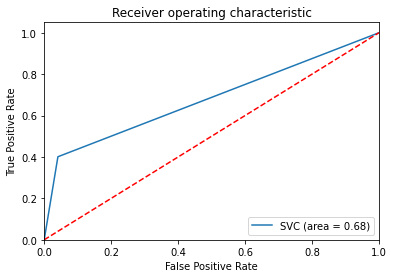

In [34]:
#Accuracy model
print('Accuracy of logistic SVC on test set: {:.2f}'.format(svc_model.score(X_test, y_test)))
print("")

#confussion matrix
confusion_matrix2 = confusion_matrix(y_test, y_test_p2)
print(confusion_matrix2)
print("")

#Classification report
print("Evaluation report : ")
print(classification_report(y_test, y_test_p2))

#ROC Curve
logit_roc_auc2 = roc_auc_score(y_test, y_test_p2)
print("AUC Score : ", logit_roc_auc2)
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_test_p2)
plt.figure()
plt.plot(fpr2, tpr2, label ='SVC (area = %0.2f)' % logit_roc_auc2)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Intepretation :

SVC has high ability to produce Tomorrow is No Rain with Precision value 0.85 , Recall value 0.96 and F1-Score value 0.90 (almost perfect).

But it has poor ability to produce Tomorrow is Rain with its precision value 0.73, recall value 0.40, F1-Score value 0.52

Generally, SVC also have fair accuracy which 0.84 like Logistic Regression and lower probability of resulting confusion matrics of each treshold which only 0.68

### Fitting Evaluation

In [35]:
print("Accuracy Train Data of Logistic Regression Model :", accuracy_score(y_train, y_train_p1))
print("Accuracy Test Data of Logistic Regression Model  :", accuracy_score(y_test, y_test_p1))
print("Difference Logistic Regression:", abs((accuracy_score(y_train, y_train_p1))-(accuracy_score(y_test, y_test_p1))) )

print("")
print("Accuracy Train Data of SVC :", accuracy_score(y_train, y_train_p2))
print("Accuracy Test Data of SVC  :", accuracy_score(y_test, y_test_p2))
print("Difference SVC             :", abs((accuracy_score(y_train, y_train_p2))-(accuracy_score(y_test, y_test_p2))) )




Accuracy Train Data of Logistic Regression Model : 0.8381090603546228
Accuracy Test Data of Logistic Regression Model  : 0.8382920215406944
Difference Logistic Regression: 0.00018296118607152856

Accuracy Train Data of SVC : 0.8372783607527857
Accuracy Test Data of SVC  : 0.8368406981629302
Difference SVC             : 0.0004376625898555586


From accuracy score of each model, Logistic Regression is tend to underfitting because it test accuracy is better than its train accuracy. While, SVC model tend too overfit because its train data has better accuracy than its test data.

But Logistic Regression is better because it has small difference accuracy from train and test data than SVC.

### Summary Evaluation

We could summary the intrepretation below :

1. Logistic Regression has better Precision,Recall than SVC, and have same F1 Score with SVC in predicting Tomorrow is not rain.
2. SVC has better Recall , F1 Score than Logistic Regression but Logistic Regression has better Precision in predicting Tomorrow is rain.
3. Both model has same accuracy value = 0.84
4. Logistic Regression has better probability total of AUC value (0.69) than SVC value (0.86).
5. From fitting perspective, Logistic Regression tend to underfitting while SVC tends to overfitting. But between both of them, Logistic Regression is better because it has small difference accuracy from its train set vs test set.

From above summary, we can conclude Logistic Regression is the best model from both model trained. So we will use Logistic Regression for our model.

_Notes : The decision is based on this notebook test and author environment limitation. SVC might be the best if more vary hyperparameter can be tested in better environment in another chance_

## Model Iference

In this section we will use previous sample data to try our final prediction. But before that, we need to pre process our sample data first.

In [36]:
#Define sample data
X_sample = sample_df.drop(['RainTomorrow'], axis=1)
y_sample = sample_df['RainTomorrow']

X_cat = X_sample.select_dtypes(include="object")
X_num = X_sample.select_dtypes(exclude="object")

#Normalize or scaling the sample data with previous encoder
X_sample_cat = pd.DataFrame(feat_en.transform(X_cat), columns=X_cat.columns)
X_sample_num = pd.DataFrame(scaler.transform(X_num), columns=X_num.columns)
y_sample_scaled = target_en.transform(y_sample)

#Define X features
X_sample_scaled = pd.concat([X_sample_cat[["RainToday","WindGustDir"]], X_sample_num[['Humidity3pm','Humidity9am','Rainfall', 'Pressure9am','WindGustSpeed']]], axis=1)


In [37]:
#Predict RainTomorrow
y_sample_pred = log_reg.predict(X_sample_scaled)

#Result
result = pd.DataFrame({"Actual RainTomorrow": y_sample_scaled, "Pred RainTomorrow":y_sample_pred})


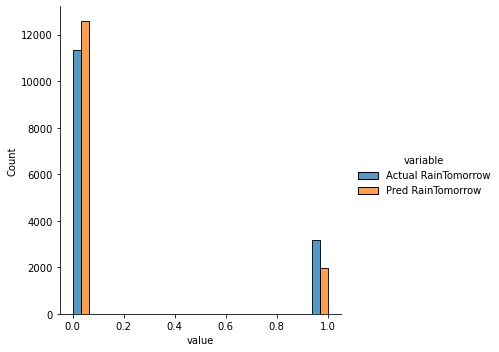

In [38]:
#Graph
samples = pd.melt(result)
sns.displot(samples, x='value', hue='variable', multiple="dodge") 
plt.show()

From above we could see difference frequency of our sample predicted by the model vs its actual. It's not 100% true well but it's almost precise.

## Conclusion

Below the conclusion of this notebook, recalling the Goals.
1. Between Logistic Regression and SVC for classify wether Tomorrow is rain or not, Logistic Regression is the best model because it has high ability to predict Tomorrow is Rain or Not by its evaluation value metrics (Precision, Recall, F1 Score and AUC Score) eventhough both of them has same accuracy value. Not only that, from fitting perspective Logistic Regression is better than SVC eventhough it tends to underfitting but the difference of accuracy is lower than SVC.
2. The highest average rainfall is happened on February 2008 and the location who has most often rainy day is in Sydney while NewCastle is the most rare in that year.
3. We could say that in 2008 , Sydney is the most wet location in Austrila and NewCastle is the most dry place

